In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
print('all libs impoted!')
model_path = 'models/'

all libs impoted!


# Utile Functions

In [25]:
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

def create_submission(model, X, test, model_name):
    y_hat = model.predict(X).clip(0, 20)
    submission = pd.DataFrame(columns = ['ID', 'item_cnt_month'])
    submission.ID = test.index.values
    submission.item_cnt_month = y_hat
    file_save_path = model_name + '.csv'
    submission.to_csv(file_save_path, index = False)
    print('Saved to: ', file_save_path)
    return submission

# Load Meta Features

In [16]:
cols = ['lgbm', 'catboost', 'lr', 'lasso','network', 'xgboost']
X_test_level2 = pd.read_csv(model_path + 'X_test_level2.csv', header = None)
X_test_level2.columns = cols

y_train_level2 = pd.read_pickle(model_path + 'y_train_level2.pkl')
y_train_level2 = y_train_level2.reset_index(drop = True)

X_train_level2 = pd.read_csv(model_path + 'X_train_level2.csv', header = None, )
X_train_level2.columns = cols
dates_train_level2 = pd.read_pickle(model_path + 'dates_train_level2.pkl')
dates_train_level2 = dates_train_level2.reset_index(drop = True)

subcols = ['lgbm', 'catboost', 'xgboost']
X_train_level2 = X_train_level2[subcols]
X_test_level2 = X_test_level2[subcols]

# Build Meta Model

In [17]:
last_month = dates_train_level2.max()
X_train_meta = X_train_level2[dates_train_level2 < last_month]
y_train_meta = y_train_level2[dates_train_level2 < last_month]

X_val_meta = X_train_level2[dates_train_level2 == last_month]
y_val_meta = y_train_level2[dates_train_level2 == last_month]

In [18]:
lr_meta_model = LinearRegression(normalize = True)

# Train Meta Model

In [19]:
lr_meta_model.fit(X_train_meta, y_train_meta)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Evaluate Meta Model

In [20]:
print('rmse on meta train: ', rmse(lr_meta_model.predict(X_train_meta).clip(0, 20), y_train_meta))
print('rmse on meta validation: ', rmse(lr_meta_model.predict(X_val_meta).clip(0, 20), y_val_meta))

rmse on meta train:  0.909833309713433
rmse on meta validation:  0.9054708888343183


# Create Submission

## Load test set

In [21]:
test_df = pd.read_csv('data/test.csv').set_index('ID')

In [22]:
test_df.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [34]:
submission = create_submission(lr_meta_model, X_test_level2, test_df, 'final_submission')

Saved to:  final_submission.csv


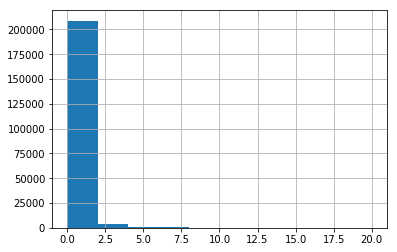

In [32]:
submission.item_cnt_month.hist()
plt.show()